In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv("Spotify -Raw Data.csv",encoding='ISO-8859-1')
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["in_spotify_playlists"] = pd.to_numeric(df["in_spotify_playlists"], errors="coerce")
df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"], errors="coerce").fillna(0)
df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"], errors="coerce").fillna(0)
df["in_spotify_charts"] = pd.to_numeric(df["in_spotify_charts"], errors="coerce").fillna(0)
df["in_apple_playlists"] = pd.to_numeric(df["in_apple_playlists"], errors="coerce").fillna(0)
df["in_apple_charts"] = pd.to_numeric(df["in_apple_charts"], errors="coerce").fillna(0)
df["in_deezer_charts"] = pd.to_numeric(df["in_deezer_charts"], errors="coerce").fillna(0)
df = df.dropna()

threshold = df["streams"].quantile(0.80)  # Top 10% most streamed songs
df["popular"] = (df["streams"] >= threshold).astype(int) 

features = ["bpm", "danceability_%", "valence_%", "energy_%", "acousticness_%",
    "instrumentalness_%", "liveness_%", "speechiness_%", "in_spotify_playlists",
    "in_spotify_charts", "in_apple_playlists", "in_apple_charts", "in_deezer_playlists",
    "in_deezer_charts", "in_shazam_charts"]
X = df[features]
y = df["popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Full dataset distribution:\n", df["popular"].value_counts())
print("Train set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())
print(df["popular"].value_counts())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred,zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Full dataset distribution:
 popular
0    685
1    172
Name: count, dtype: int64
Train set distribution:
 popular
0    548
1    137
Name: count, dtype: int64
Test set distribution:
 popular
0    137
1     35
Name: count, dtype: int64
popular
0    685
1    172
Name: count, dtype: int64
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       137
           1       0.89      0.69      0.77        35

    accuracy                           0.92       172
   macro avg       0.91      0.83      0.86       172
weighted avg       0.92      0.92      0.91       172


Confusion Matrix:
 [[134   3]
 [ 11  24]]


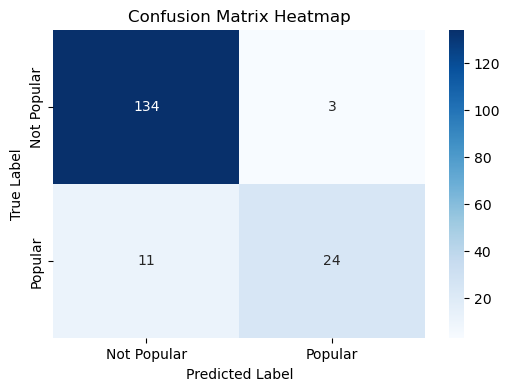

In [3]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [5]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature Importance
importances = np.abs(model.coef_[0])  # Take absolute value of coefficients
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display results
print(accuracy)
print(report)
print

(0.9186046511627907,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       137\n           1       0.89      0.69      0.77        35\n\n    accuracy                           0.92       172\n   macro avg       0.91      0.83      0.86       172\nweighted avg       0.92      0.92      0.91       172\n',
                  Feature  Importance
 8   in_spotify_playlists    2.627415
 2              valence_%    0.781051
 9      in_spotify_charts    0.641830
 10    in_apple_playlists    0.597800
 12   in_deezer_playlists    0.522432
 14      in_shazam_charts    0.468106
 3               energy_%    0.290019
 4         acousticness_%    0.235918
 6             liveness_%    0.113648
 11       in_apple_charts    0.094092
 0                    bpm    0.086693
 1         danceability_%    0.081092
 13      in_deezer_charts    0.048880
 7          speechiness_%    0.048844
 5     instrumentalness_%    0.047573)